In [1]:
# %%capture
# !pip install torch numpy pandas matplotlib scikit-learn

# !pip install git+https://github.com/gretelai/gretel-synthetics.git

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.1-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.0 kB ? eta -:--:--
     ------------------------------------- 165.0/165.0 kB 10.3 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp39-cp39-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ----------

  Running command git clone --filter=blob:none --quiet https://github.com/gretelai/gretel-synthetics.git 'C:\Users\lia68085\AppData\Local\Temp\pip-req-build-lmn7h_m9'


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
import json
import torch
from pathlib import Path

from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType



c:\Users\lia68085\AppData\Local\anaconda3\envs\synthetic\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataanalyse

In [51]:
root=os.getcwd()
parent_dir = os.path.dirname(root)
parent_dir
root=os.getcwd()
datapath=os.path.join(parent_dir,'Dataanalyse\\axis2_demo_tablepart1_0.csv')
datapath

'c:\\Users\\lia68085\\Thesis\\Thesis\\thesis\\Dataanalyse\\axis2_demo_tablepart1_0.csv'

In [107]:

def getdata(path, length,interval):
    df=pd.read_csv(path)
    with open ('important_features.json', 'r') as f:
        importance = json.load(f)[:10]
    importance=['Timestamp']+importance
    
    newdf=df[importance]
    newdf=newdf.copy()
    newdf['Timestamp'] = pd.to_datetime(newdf['Timestamp'], unit='s')
    difftiem=np.unique(newdf['Timestamp']) 
    data=[]
    for time in difftiem:
        length_of_data=len(newdf[newdf['Timestamp']==time])
        if length_of_data>length:
            slidedata=newdf[newdf['Timestamp']==time]
            slidedata=slidedata.copy()

            slidedata['datetime'] = pd.date_range(start=slidedata['Timestamp'].iloc[0], periods=len(slidedata), freq=str(interval))
            slidedata=slidedata.drop(columns=['Timestamp'], axis=1)

            data.append(slidedata)

    return data

In [135]:
data=getdata(datapath,2000,'S')

In [110]:
data[2].columns

Index(['Standardabweichung_y', 'Variance_z', 'Variance_y',
       'Standardabweichung_z', 'Effektivwert_x',
       'Mittlere_Absolute_Abweichung_y', 'Effektivwert_y',
       'Standardabweichung_x', 'Mittelwert_x', 'Variance_x', 'datetime'],
      dtype='object')

In [146]:
    
def dataconcatente(listdata):
     
    two = np.empty((0, 60, 10))

    for i, data in enumerate(listdata):

        sensor_df=data
        COLUMNS = list(sensor_df.columns)
        COLUMNS.remove('datetime')
        train_df=sensor_df
        # train_df = train_df.drop(columns="datetime").to_numpy()
        train_df =pd.DataFrame(train_df)
        train_df = train_df.drop(columns="datetime").to_numpy()

        # print(train_df.shape)
        n = train_df.shape[0] // 60
        train_df = train_df[:(n*60),:].reshape(-1, 60, train_df.shape[1])
        print(train_df.shape)
        two = np.concatenate((two, train_df), axis=0)
        print(two.shape)
        print('*'*20)
    return two

In [147]:
final=dataconcatente(data)
final.shape

(36, 60, 10)
(36, 60, 10)
********************
(39, 60, 10)
(75, 60, 10)
********************
(44, 60, 10)
(119, 60, 10)
********************


(119, 60, 10)

In [58]:
# rootpath=os.getcwd()
# # go to the upper directory of rootpath
# rootpath=Path(rootpath).parents[0]
# #rootpath= './Thesis/Dataanalyse/'
# rootpath
# df=pd.read_csv(os.path.join(rootpath,'Dataanalyse/axis2_demo_tablepart1_0.csv'))
# with open (os.path.join(rootpath,'Dataanalyse/important_features.json'), 'r') as f:
#     features = json.load(f)[:10]
# features=['Timestamp']+features
# newdf=df[features]
# newdf=newdf.copy()
# newdf['Timestamp'] = pd.to_datetime(newdf['Timestamp'], unit='s')
# # create a new data column starting from the first timestamp, with a frequency of 1 second.
# newdf['datetime'] = pd.date_range(start=newdf['Timestamp'].iloc[0], periods=len(newdf), freq='S')
# newdf=newdf.drop(columns=['Timestamp'], axis=1)
# #change the last column to the first column
# cols = newdf.columns.tolist()   
# cols = cols[-1:] + cols[:-1]
# newdf=newdf[cols]
# newdf.head()
# newdf.to_csv('true_data.csv', index=False)

In [61]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd
# # fig,axs = plt.subplots(10,1,figsize=(10,2*10))

# # for i,j in enumerate(COLUMNS) :

# #     axs[i].plot(train_df["datetime"],train_df[j],label='GroundTruth')

# #     axs[i].legend()
# #     plt.ylabel("Temperature (Celsius)")
# #     plt.xlabel("Date")
# #     plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1000))  # 每10天显示一次日期
# #     plt.xticks(rotation=90)
# # plt.show()
# # # 假设 train_df 已经正确载入，并且 "datetime" 列已经转换为 datetime 类型
# fig, axs = plt.subplots(10, 1, figsize=(10, 20))  # 高度根据特征数量动态调整

# for i,j in enumerate(COLUMNS) :
#     # 如果只有一列，当只有一个特征时，axs不是列表，需要做一下处理
#     ax = axs[i] 
    
#     ax.plot(train_df[j], label='Actual')
#     ax.legend()
# plt.ylabel("Temperature (Celsius)")
# plt.xlabel("Date")
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1000))  # 每10天显示一次日期
# plt.xticks(rotation=90)
# plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
# plt.show()


In [165]:
x=list(data[0].columns)
x

['Standardabweichung_y',
 'Variance_z',
 'Variance_y',
 'Standardabweichung_z',
 'Effektivwert_x',
 'Mittlere_Absolute_Abweichung_y',
 'Effektivwert_y',
 'Standardabweichung_x',
 'Mittelwert_x',
 'Variance_x',
 'datetime']

In [166]:

xaxis_1day = data[0]["datetime"][:60]
len(xaxis_1day)
feat = list(data[0].columns)
feat.remove('datetime')

In [167]:
feat

['Standardabweichung_y',
 'Variance_z',
 'Variance_y',
 'Standardabweichung_z',
 'Effektivwert_x',
 'Mittlere_Absolute_Abweichung_y',
 'Effektivwert_y',
 'Standardabweichung_x',
 'Mittelwert_x',
 'Variance_x']

In [175]:
final[6,:,:].shape

(60, 10)

In [177]:
range(5)

range(0, 5)

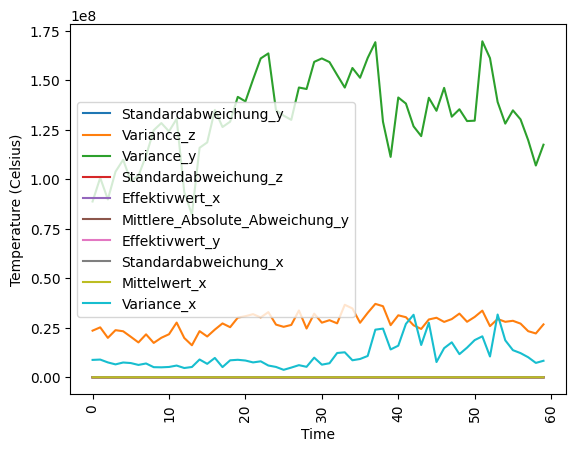

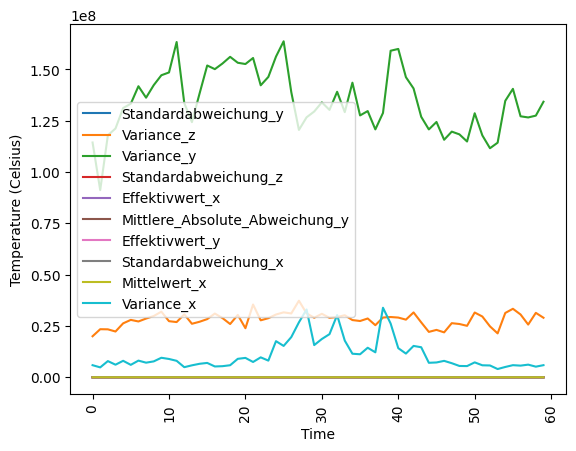

In [179]:
# Show a few of the 1-day training samples

xaxis_1day = data[0]["datetime"][:60]
len(xaxis_1day)
feat = list(data[0].columns)
feat.remove('datetime')

def plot_day(f):
    for i, c in enumerate(feat):
        plt.plot(range(len(f)), f[:,i], label=c)
    # ax = plt.gca()
    # ax.xaxis.set_major_locator(md.HourLocator(byhour=range(2,24,3)))
    # ax.xaxis.set_major_formatter(md.DateFormatter("%H:%M"))
    # plt.gca().xaxis.set_major_locator(md.DayLocator(interval=int(len(xaxis_1day)/10)))  # 每10天显示一次日期

    plt.legend()
    plt.xlabel("Time")
    plt.xticks(rotation=90)

    plt.ylabel("Temperature (Celsius)")
    plt.show()

plot_day(final[6,:,:])
plot_day(final[8,:,:])
# plot_day(features[21,:,:])

In [15]:
# Recommended to train with a GPU
torch.cuda.is_available()

False

In [180]:
final.shape

(119, 60, 10)

In [181]:
max_sequence_len=final.shape[1]
max_sequence_len

60

In [183]:
final[:,:,9].shape

(119, 60)

In [279]:
%%capture

# Train DGAN model
model = DGAN(DGANConfig(
    max_sequence_len=final.shape[1],
    sample_len=60,
    batch_size=2,
    apply_feature_scaling=True,
    apply_example_scaling=True,
    use_attribute_discriminator=True,
    generator_learning_rate=1e-4,
    discriminator_learning_rate=1e-4,
    epochs=10,
))

model.train_numpy(
    final,
    feature_types=[OutputType.CONTINUOUS] * final.shape[2],
)

# Generate synthetic data



In [280]:
_,synthetic_features = model.generate_numpy(50)


In [281]:
synthetic_features=np.array(synthetic_features)
synthetic_features.shape

(50, 60, 10)

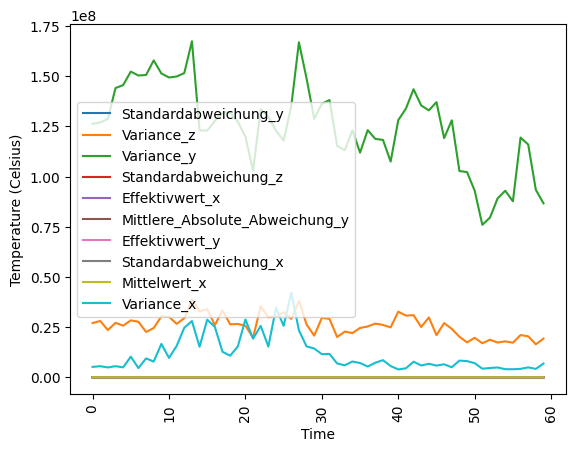

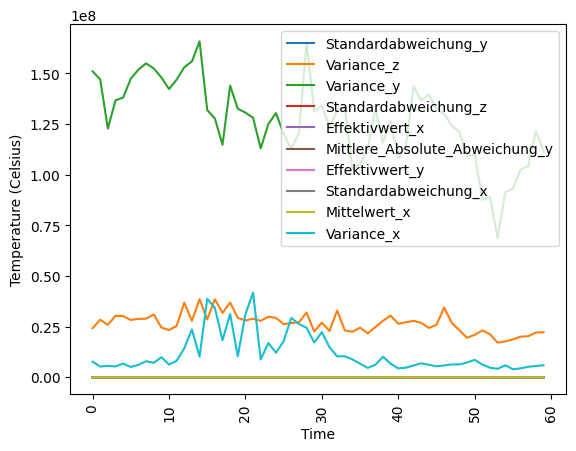

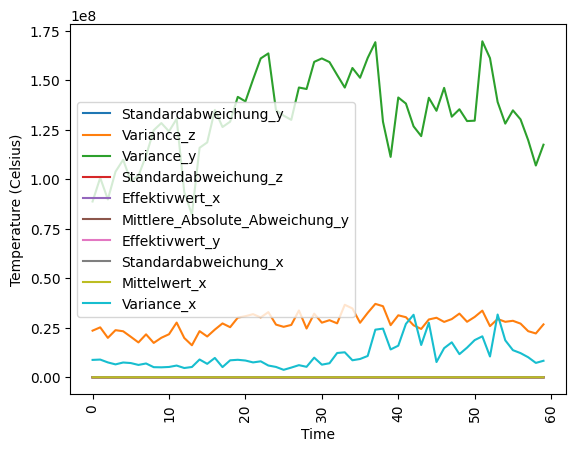

In [282]:
plot_day(final[1,:,:])
plot_day(final[45,:,:])
plot_day(final[6,:,:])

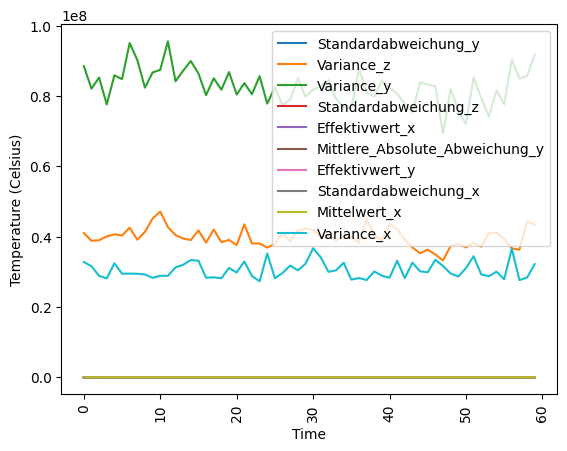

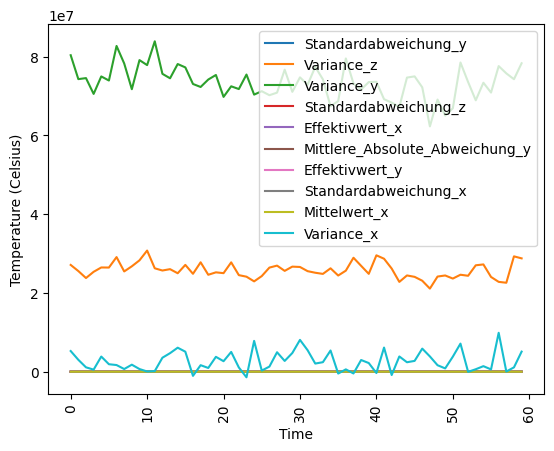

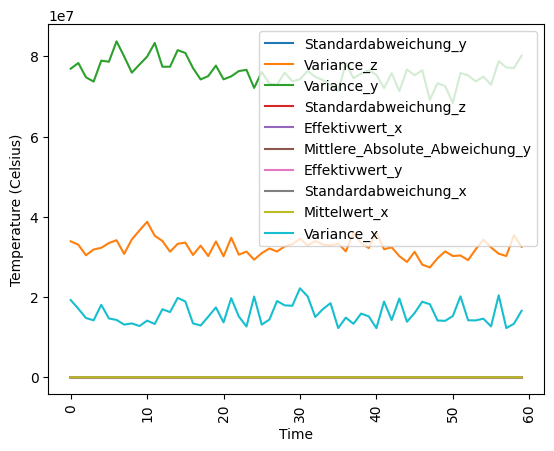

In [283]:
# Show some synthetic 1-day samples
plot_day(synthetic_features[1,:,:])
plot_day(synthetic_features[45,:,:])
plot_day(synthetic_features[10,:,:])

# Overall trends are similar to training samples, but with more local noise

In [284]:
synthetic_df = pd.DataFrame(synthetic_features.reshape(-1, synthetic_features.shape[2]), columns=data[2].columns[1:])
synthetic_df

,Variance_z,Variance_y,Standardabweichung_z,Effektivwert_x,Mittlere_Absolute_Abweichung_y,Effektivwert_y,Standardabweichung_x,Mittelwert_x,Variance_x,datetime
0,6182.291016,26806226.0,56587960.0,2232.598145,1908.416748,4543.064941,6393.577148,1542.183594,348.890961,18080210.0
1,5677.979492,24895008.0,53260276.0,2240.371094,2009.925293,5335.135254,6843.741211,1805.854980,283.211151,16306529.0
2,5400.006348,24680446.0,53681976.0,2209.144531,1735.269165,4886.696289,5876.684570,1692.953613,273.231415,14338880.0
3,6136.537109,25846848.0,52814864.0,2024.765381,1699.822021,5016.751465,6697.199707,1515.463623,301.257050,13158900.0
4,5794.625488,25715200.0,53721260.0,2362.574463,1793.283569,5295.586426,6630.480957,1604.087524,316.670319,17681718.0
...,...,...,...,...,...,...,...,...,...,...
2995,5724.903809,53901656.0,87625008.0,3568.854248,3630.910889,5837.728516,5573.938965,2531.013672,221.129120,5888870.5
2996,6451.631836,48874584.0,106397040.0,4144.673340,3940.404053,5683.084473,5820.087891,2670.756104,202.407379,18998612.0
2997,6275.425293,48488272.0,99656912.0,3804.158447,3982.085938,5677.641602,6433.366211,2712.572266,141.331696,4892448.0
2998,5806.160645,58143568.0,100165800.0,3941.334229,4604.735840,5146.102051,5070.162598,2803.617188,171.280792,6689187.5


In [285]:
# Compare (non-temporal) correlations between the 4 temperatures
synthetic_df = pd.DataFrame(synthetic_features.reshape(-1, synthetic_features.shape[2]), columns=data[2].columns[1:])

print("Correlation in real data:")
print(data[2].corr())
print()
print("Correlation in synthetic data:")
print(synthetic_df.corr())

# Correlations between temperature variables are similar

Correlation in real data:
                                Standardabweichung_y  Variance_z  Variance_y  \
Standardabweichung_y                        1.000000    0.979442    0.993629   
Variance_z                                  0.979442    1.000000    0.973724   
Variance_y                                  0.993629    0.973724    1.000000   
Standardabweichung_z                        0.993305    0.993207    0.981339   
Effektivwert_x                              0.950156    0.948009    0.941013   
Mittlere_Absolute_Abweichung_y              0.999375    0.976983    0.996322   
Effektivwert_y                              0.999992    0.979475    0.993895   
Standardabweichung_x                        0.951425    0.949018    0.942122   
Mittelwert_x                                0.128126    0.122706    0.126339   
Variance_x                                  0.838574    0.851460    0.839282   

                                Standardabweichung_z  Effektivwert_x  \
Standardabweichung_y 

C:\Users\lia68085\AppData\Local\Temp\ipykernel_8284\1236717808.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data[2].corr())


In [250]:
# 为简单起见，我们可以聚焦于比较单个特征
real_data_feature = final[:, :60, 0]  # 选择第一个特征
synthetic_data_feature = synthetic_features[:, :60, 0]

In [251]:
real_data_feature

array([[  163.966,   171.94 ,   156.322, ..., 11912.5  , 12591.6  ,
        12773.3  ],
       [11229.9  , 11260.3  , 11339.5  , ..., 10761.6  ,  9659.29 ,
         9303.04 ],
       [10217.1  ,  9543.58 ,  9655.06 , ..., 10579.8  , 10936.2  ,
        10466.9  ],
       ...,
       [  159.247,   157.613,   158.265, ...,   165.591,   162.439,
          178.834],
       [  167.667,   158.177,   163.255, ..., 11959.5  , 11237.9  ,
        11323.7  ],
       [12050.6  , 12114.   , 11973.1  , ..., 10149.6  , 10910.7  ,
        10299.4  ]])

In [252]:
synthetic_data_feature

array([[7565.2095, 8262.738 , 8237.246 , ..., 8029.8486, 8013.019 ,
        7753.1924],
       [5953.1753, 7016.008 , 6718.687 , ..., 6579.1973, 6732.96  ,
        6662.4736],
       [8344.961 , 8918.455 , 8788.019 , ..., 8711.466 , 8856.158 ,
        8766.829 ],
       ...,
       [6881.328 , 7564.1353, 7491.7944, ..., 7352.8857, 7463.8447,
        7357.8354],
       [7538.017 , 8234.417 , 8129.602 , ..., 8101.6675, 7997.0967,
        7983.5063],
       [6333.145 , 7124.308 , 7064.873 , ..., 6808.821 , 6915.8887,
        6807.8916]], dtype=float32)

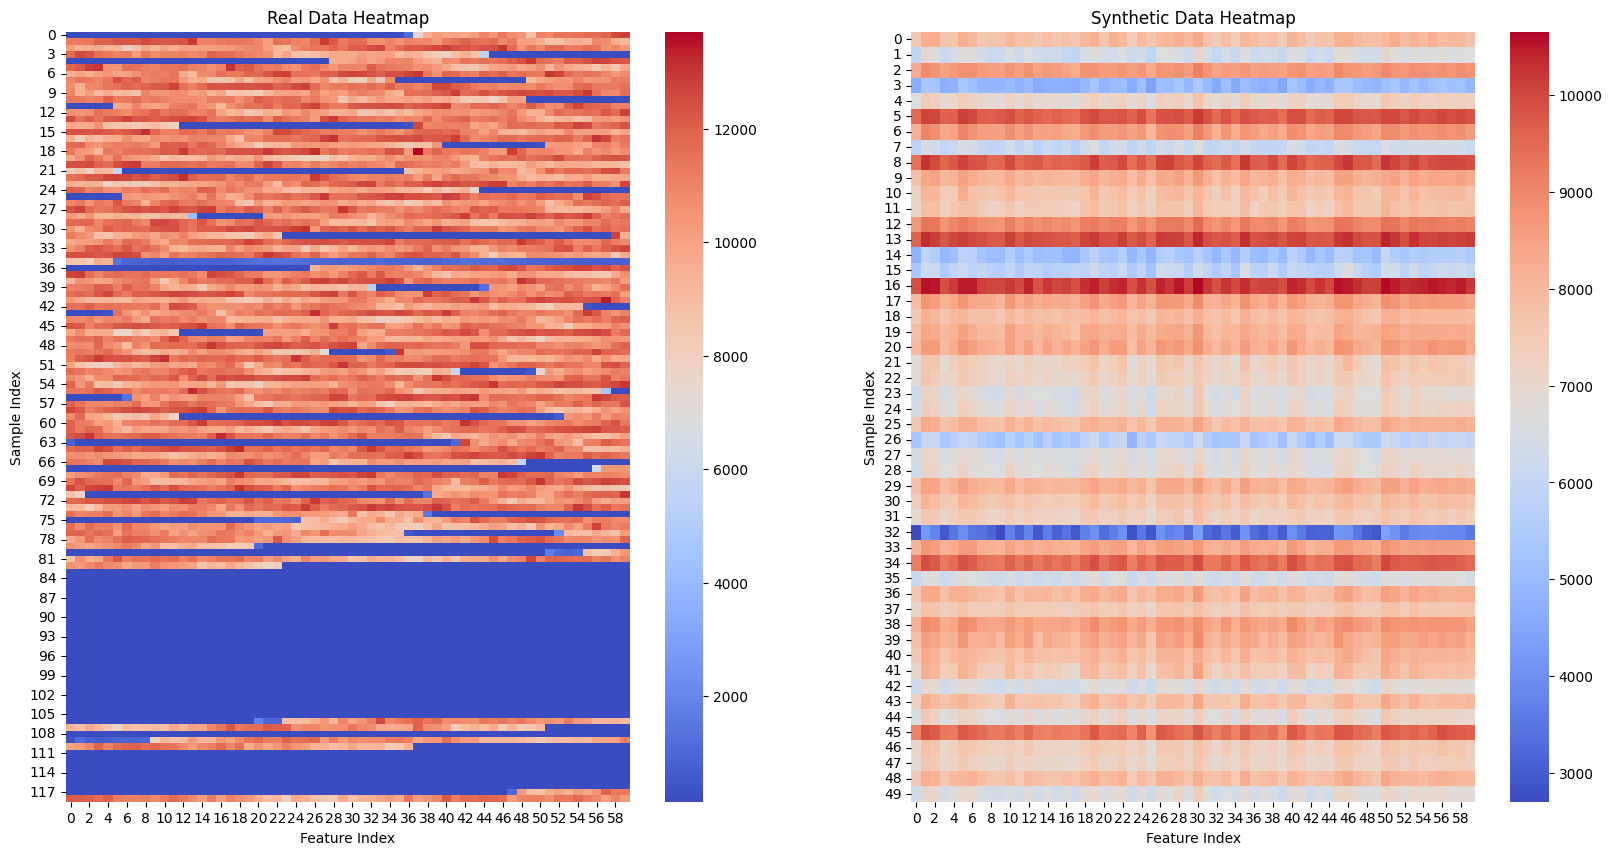

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.heatmap(real_data_feature, annot=False, cmap='coolwarm', cbar=True)
plt.title('Real Data Heatmap')
plt.xlabel('Feature Index')
plt.ylabel('Sample Index')

plt.subplot(1, 2, 2)
sns.heatmap(synthetic_data_feature, annot=False, cmap='coolwarm', cbar=True)
plt.title('Synthetic Data Heatmap')
plt.xlabel('Feature Index')
plt.ylabel('Sample Index')

plt.show()


In [287]:
final.shape

(119, 60, 10)

In [288]:
final[:,:,1].shape

(119, 60)

In [289]:
synthetic_features.shape

(50, 60, 10)

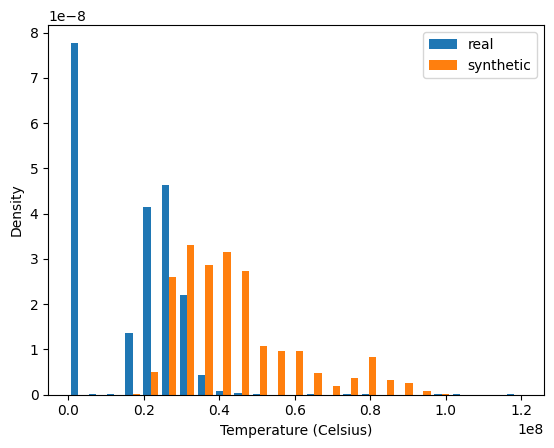

In [294]:
# Compare distribution of T_out values
plt.hist([final[:,:,1].flatten(), synthetic_features[:,:,1].flatten()], 
         label=["real", "synthetic"],
         bins=25,
         density=True)
plt.legend()
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Density")
plt.show()

# Temperature distribution for T_out is similar

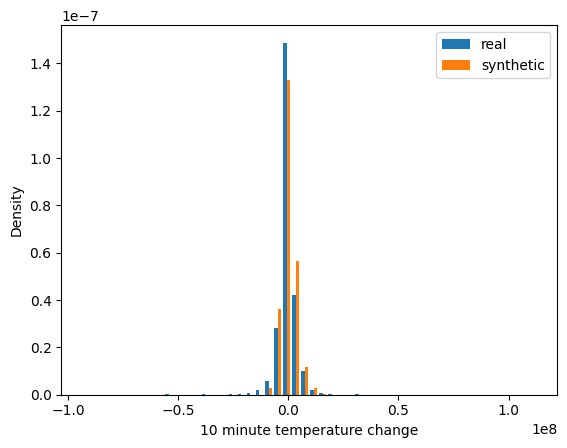

In [295]:
# Compare distribution of 1-step (10 minute) diffs for T_out
real_diffs = np.diff(final, axis=1)
synthetic_diffs = np.diff(synthetic_features, axis=1)

plt.hist([real_diffs[:,:,1].flatten(), synthetic_diffs[:,:,1].flatten()],
         label=["real", "synthetic"],
         bins=50,
         density=True)
plt.legend()
plt.xlabel("10 minute temperature change")
plt.ylabel("Density")
plt.show()

# 1-step diffs for synthetic data have higher variance, this aligns with the
# increased noise visible in the plots